In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
plt.rcParams['font.size'] = 13
plt.rcParams['figure.figsize'] = [8,6]
import datetime as dt
import scipy.special as sf
import scipy.optimize as opt

In [135]:
def aper_init(amp, pixsize_x, pixsize_y, pixn_x, pixn_y, shape=0, r=2, a=.5, b=8, d=2, sigmainv=5):
    """
    pixsize: physical size of each pixel
    pixn: number of pixels in each dimension
    shape: shape of the E field
    amp = amplitude
    r = radius
    a = width of a slit
    b = height of a slit
    d = separation between two slits
    sigma = width of a gaussian
    """
    aper_plane = np.ones(shape=(pixn_x,pixn_y))*0
    #form physical dimension of x and y
    x = np.linspace(0,pixsize_x*(pixn_x-1), pixn_x)
    y = np.linspace(0,pixsize_y*(pixn_y-1), pixn_y)
    x,y = x-x.max()/2, y-y.max()/2 #place the origin at the center of the aperture plane
    f = np.fft.fftshift(np.fft.fftfreq(len(x),x[1]-x[0]))
    
    if shape==0: #circle
        E_idx = (x[np.newaxis,:])**2 + (y[:,np.newaxis])**2 < r**2
        aper_plane[E_idx] = amp
    if shape==1: #single slit
        E_idx = ((x[np.newaxis,:]>0)&(x[np.newaxis,:]<a)) & ((y[:,np.newaxis]>(-b/2))&(y[:,np.newaxis]<(b/2)))
        aper_plane[E_idx] = amp
    if shape==2: #double slit
        E_idx1 = ((x[np.newaxis,:]>(-d/2-a/2))&(x[np.newaxis,:]<(-d/2+a/2))) & ((y[:,np.newaxis]>(-b/2))&(y[:,np.newaxis]<(b/2)))
        E_idx2 = ((x[np.newaxis,:]>(d/2-a/2))&(x[np.newaxis,:]<(d/2+a/2))) & ((y[:,np.newaxis]>(-b/2))&(y[:,np.newaxis]<(b/2)))
        aper_plane[E_idx1|E_idx2] = amp
    if shape==3: # gaussian
        xx,yy = np.meshgrid(x, y)
        aper_plane = np.exp(-sigmainv*(xx**2+yy**2))
    
    fig = plt.figure(figsize=(17,8))
    ax1 = fig.add_subplot(121)
    ax1.imshow(aper_plane, extent=(x.min(),x.max(),y.min(),y.max()),cmap='plasma')
    ax2 = fig.add_subplot(122)
    #ax2.imshow(np.abs(np.fft.fftshift(np.fft.fft2(aper_plane))))
    ax2.imshow(np.abs(np.fft.fftshift(np.fft.fft2(aper_plane))),cmap='plasma')
    return x,y,aper_plane,f



In [112]:
x = np.linspace(-5, 5, 5000)
#y = np.where(abs(x)<=0.5, 1, 0) #step function
def gauss(x,a):
  g = np.exp(-a*x**2)
  return(g)
y = gauss(x,5)
y_fft = np.fft.fftshift(np.abs(np.fft.fft(y)))
#y_fft = np.fft.fft(y)

def fft(u,X):
  fft = X*np.sinc(np.pi*X*u)
  return(fft)
def gauss_fft(k,a):
  g_fft = np.sqrt(np.pi/a)*np.exp(-np.pi**2*k**2/a)
  return(g_fft)

In [113]:
f = np.fft.fftshift(np.fft.fftfreq(len(x),x[1]-x[0]))
#print(f)

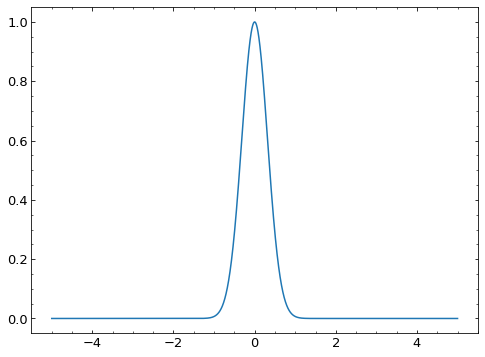

In [114]:
plt.plot(x,y)


In [115]:
print((y_fft.max()/gauss_fft(f,5).max()))

499.9


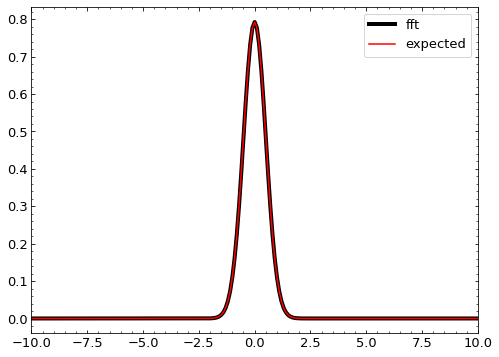

In [120]:
plt.plot(f,y_fft/(len(x)/10),color='black',lw=4,label='fft')
plt.plot(f,gauss_fft(f,5),color='red',label='expected')
plt.xlim(-10,10)
plt.legend()
#plt.plot(x,fft(x,1))
#plt.xlim(-1,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


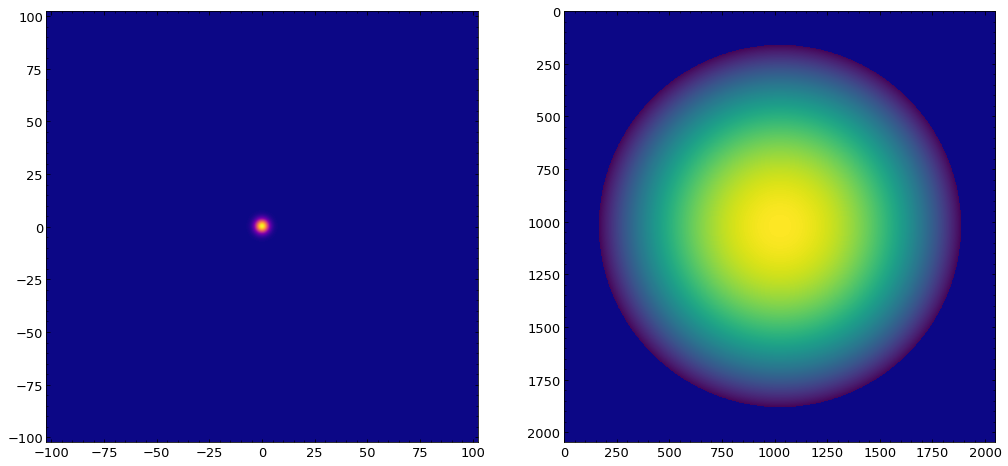

In [159]:
# Gaussian
def twodgauss_fft(x,a):
  fft = np.sqrt(np.pi/a) * np.exp(-np.pi**2*x**2/(2*a))
  return(fft)


amp = aper_init(100., 0.1,0.1,2048,2048,shape=3,r=0.7,sigmainv=0.1)
plt.imshow(np.log10(amp[2])) #remove log10

(-2.0, 2.0)

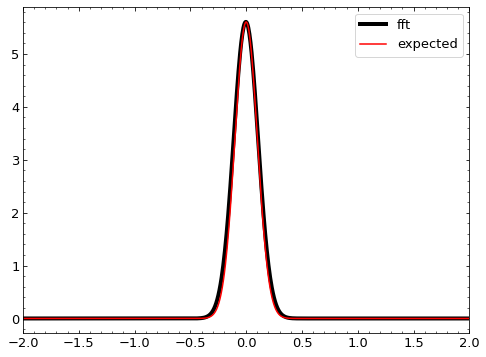

In [163]:
plt.plot(amp[3],amp[2][1024]*twodgauss_fft(amp[3],0.1).max()/amp[2][1024].max(),color='black',label='fft',lw=4)
plt.plot(amp[3],twodgauss_fft(amp[3],0.1),color='red', label='expected')
plt.legend()
plt.xlim(-2,2)

In [151]:
twodgauss_fft(amp[3],0.1).max()/amp[2][1024].max()

31.431638426811276

In [150]:
amp[2][1024].max()

0.9995001249791693